In [2]:
import pandas as pd
import requests
import sys
import os

DATA_PATH = '../Data'
DATA_FILENAME = 'Nobel_laureates.json'

### Create a dataset directory if not exist

In [3]:
if not os.path.exists(DATA_PATH):
    os.mkdir(DATA_PATH)

### Download the Nobel Laureates Dataset

In [4]:
if DATA_FILENAME not in os.listdir(DATA_PATH):
    sys.stderr.write("[INFO] Dataset is loading.\n")
    url = "https://www.dropbox.com/s/m6ld4vaq2sz3ovd/nobel_laureates.json?dl=1"
    r = requests.get(url, allow_redirects=True)
    open(os.path.join(DATA_PATH, DATA_FILENAME), 'wb').write(r.content)
    sys.stderr.write("[INFO] Loaded.\n")

### Create Pandas DataFrame from JSON

In [5]:
df = pd.read_json(os.path.join(DATA_PATH, DATA_FILENAME))
print(df.duplicated().any())

False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1051
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   born_in         1052 non-null   object
 1   category        1052 non-null   object
 2   country         1052 non-null   object
 3   date_of_birth   1044 non-null   object
 4   date_of_death   1044 non-null   object
 5   gender          1040 non-null   object
 6   link            1052 non-null   object
 7   name            1052 non-null   object
 8   place_of_birth  1011 non-null   object
 9   place_of_death  1044 non-null   object
 10  text            1052 non-null   object
 11  year            1052 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 106.8+ KB


In [7]:
df.dropna(subset='gender', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1040 entries, 0 to 1051
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   born_in         1040 non-null   object
 1   category        1040 non-null   object
 2   country         1040 non-null   object
 3   date_of_birth   1040 non-null   object
 4   date_of_death   1040 non-null   object
 5   gender          1040 non-null   object
 6   link            1040 non-null   object
 7   name            1040 non-null   object
 8   place_of_birth  1007 non-null   object
 9   place_of_death  1040 non-null   object
 10  text            1040 non-null   object
 11  year            1040 non-null   int64 
dtypes: int64(1), object(11)
memory usage: 105.6+ KB


In [9]:
df.reset_index(inplace=True)

In [10]:
df.head()

,index,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,0,,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
1,1,Bosnia and Herzegovina,Literature,,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric *,"Dolac (village near Travnik), Bosnia and Herze...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,2,Bosnia and Herzegovina,Chemistry,,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog *,"Sarajevo , Bosnia and Herzegovina","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
3,4,,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Belgium","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909
4,5,,Literature,Belgium,29 August 1862,6 May 1949,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,Maurice Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911


In [11]:
df.drop('index', axis=1, inplace=True)

In [12]:
df.head(20).to_dict()

{'born_in': {0: '',
  1: 'Bosnia and Herzegovina',
  2: 'Bosnia and Herzegovina',
  3: '',
  4: '',
  5: '',
  6: '',
  7: '',
  8: '',
  9: '',
  10: '',
  11: '',
  12: '',
  13: 'Belarus',
  14: 'Belarus',
  15: 'Belarus',
  16: '',
  17: '',
  18: '',
  19: ''},
 'category': {0: 'Physiology or Medicine',
  1: 'Literature',
  2: 'Chemistry',
  3: 'Peace',
  4: 'Literature',
  5: 'Peace',
  6: 'Physiology or Medicine',
  7: 'Physiology or Medicine',
  8: 'Peace',
  9: 'Physiology or Medicine',
  10: 'Physiology or Medicine',
  11: 'Chemistry',
  12: 'Physics',
  13: 'Economics',
  14: 'Peace',
  15: 'Peace',
  16: 'Literature',
  17: 'Physiology or Medicine',
  18: 'Physics',
  19: 'Physiology or Medicine'},
 'country': {0: 'Argentina',
  1: '',
  2: '',
  3: 'Belgium',
  4: 'Belgium',
  5: 'Belgium',
  6: 'Belgium',
  7: 'Belgium',
  8: 'Belgium',
  9: 'Belgium',
  10: 'Belgium',
  11: 'Belgium',
  12: 'Belgium',
  13: '',
  14: '',
  15: '',
  16: 'Denmark',
  17: 'Denmark',
  18: 

# 2. Cleaning Born_in and Country name

In [13]:
# Stage 2 
# cleaning born_in
df.born_in.replace('', None, inplace=True)
empty_bornin_idx = df.loc[df.born_in.isna(), :].index

df.iloc[empty_bornin_idx, 0] = df.iloc[empty_bornin_idx, :].place_of_birth.apply(
    lambda pb: pb.split(',')[-1].strip() if pb is not None and pb.find(',') != -1 else None)
df.dropna(subset='born_in', inplace=True)

# cleaning country name
df.replace(['US', 'United States', 'U.S.'], 'USA', inplace=True)
df.replace('United Kingdom', 'UK', inplace=True)

#print(df.born_in.to_list())


# 3. Age of Winning 

In [14]:
def extract_year(dstr):
    y = pd.to_datetime(dstr, format='%d %B %Y', errors='ignore')
    if type(y) == str:
        y = pd.to_datetime(dstr, format='%Y-%m-%d', errors='ignore')
    if type(y) == str:
        y = pd.to_datetime(dstr, format='%B %d, %Y', errors='ignore')

    if type(y) == str and len(y) == 4:
        return int(y)
    else:
        return int(y.year)

df['year_born'] = df.date_of_birth.apply(extract_year)
df['age_of_winning'] = df['year'] - df['year_born']
print(df.year_born.to_list())
print(df.age_of_winning.to_list())

[1927, 1892, 1906, 1829, 1862, 1870, 1892, 1910, 1899, 1917, 1917, 1932, 1901, 1913, 1923, 1857, 1885, 1873, 1926, 1922, 1918, 1843, 1896, 1896, 1890, 1901, 1948, 1897, 1900, 1881, 1875, 1885, 1913, 1887, 1905, 1910, 1920, 1918, 1923, 1933, 1897, 1946, 1906, 1950, 1921, 1943, 1913, 1922, 1944, 1911, 1938, 1845, 1817, 1852, 1835, 1862, 1843, 1860, 1854, 1846, 1853, 1850, 1830, 1896, 1914, 1934, 1909, 1926, 1931, 1937, 1888, 1913, 1922, 1934, 1937, 1947, 1930, 1958, 1945, 1911, 1914, 1943, 1845, 1941, 1926, 1911, 1926, 1938, 1853, 1910, 1925, 1940, 1866, 1881, 1905, 1898, 1916, 1899, 1898, 1924, 1926, 1931, 1923, 1918, 1936, 1927, 1940, 1947, 1905, 1927, 1926, 1911, 1913, 1927, 1911, 1924, 1932, 1943, 1908, 1936, 1939, 1941, 1925, 1857, 1902, 1872, 1863, 1891, 1875, 1883, 1892, 1881, 1886, 1892, 1897, 1880, 1969, 1967, 1959, 1943, 1942, 1944, 1943, 1955, 1923, 1950, 1955, 1948, 1930, 1947, 1940, 1920, 1944, 1925, 1941, 1915, 1928, 1920, 1927, 1947, 1918, 1918, 1937, 1927, 1943, 1931, 191

# 4. Plot Pie Chart

In [15]:
grouped = df.groupby('born_in', as_index=False).count()
other_countries = grouped.name < 25

In [16]:
country_df = grouped.loc[grouped.name >=25, ['born_in','name']]

In [17]:
country_df.loc[len(country_df.index)] = ['Other countries', grouped.loc[other_countries,'name'].sum()]

In [18]:
country_df.reset_index().drop('index', axis=1, inplace=True)

In [19]:
import matplotlib.pyplot as plt
import numpy as np

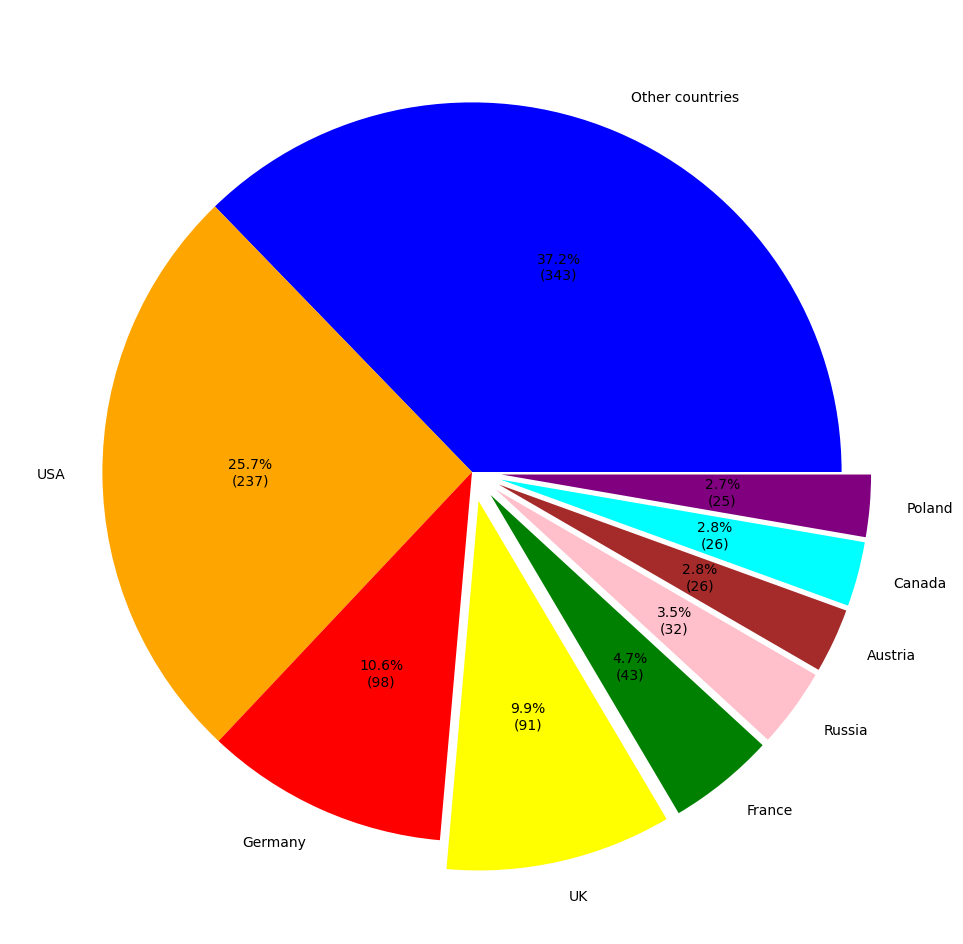

In [20]:
country_df.sort_values('name', ascending=False, inplace=True)
colors = ['blue', 'orange', 'red', 'yellow', 'green', 'pink', 'brown', 'cyan', 'purple']
explode = [0.0, 0.0, 0.0] + [0.08] * (country_df.shape[0]-3)
plt.figure(figsize=(12,12))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:.0f})"

plt.pie(x=country_df.name, labels=country_df.born_in, colors=colors, 
        explode=explode,
        autopct=lambda pct: func(pct, country_df.name));

In [21]:
female_df = df.loc[(df.category != '') & (df.gender == 'female'), ['category','name']]
male_df = df.loc[(df.category != '') & (df.gender == 'male'), ['category','name']]

In [22]:
female_group = female_df.groupby('category').name.count()
male_group = male_df.groupby('category').name.count()

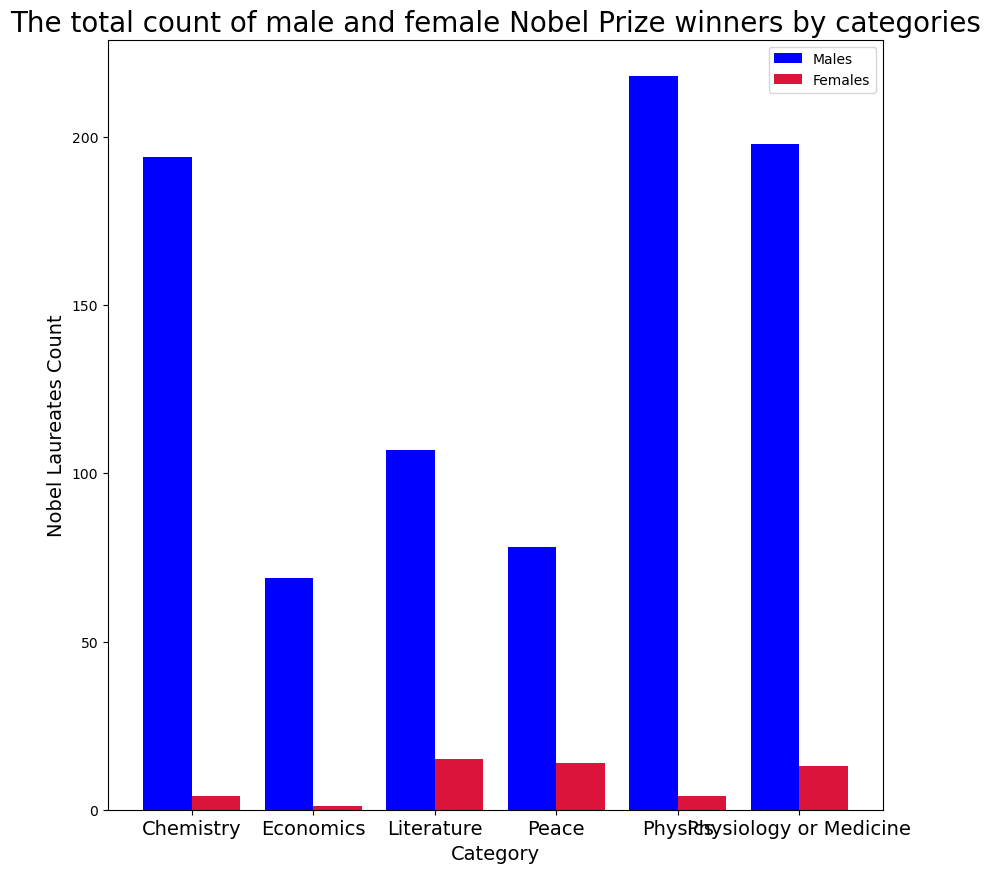

In [23]:
categories = female_group.index.to_list()
x_axis = np.arange(len(categories))
fig, ax = plt.subplots(figsize=(10,10))

ax.bar(x_axis-0.2, male_group.to_list(), width=0.4, label='Males', color='blue')
ax.bar(x_axis+0.2, female_group.to_list(), width=0.4, label='Females', color='crimson')
ax.legend(['Males','Females'])
ax.set_xticks(x_axis, categories, fontsize=14)
ax.set_title('The total count of male and female Nobel Prize winners by categories', fontsize=20)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Nobel Laureates Count', fontsize=14)
plt.show()

# 5. Plot Ages Distribution with Boxplot

In [93]:
categories = df.loc[df.category != '', 'category'].sort_values().unique()
age_of_winnings = []
for category in categories:    
    age_of_winnings.append(df.loc[df.category == category, 'age_of_winning'].to_list())

age_of_winnings.append(df.loc[:,'age_of_winning'].to_list())
categories = np.append(categories, ['All categories'])
print(len(categories))
print(categories)

7
['Chemistry' 'Economics' 'Literature' 'Peace' 'Physics'
 'Physiology or Medicine' 'All categories']


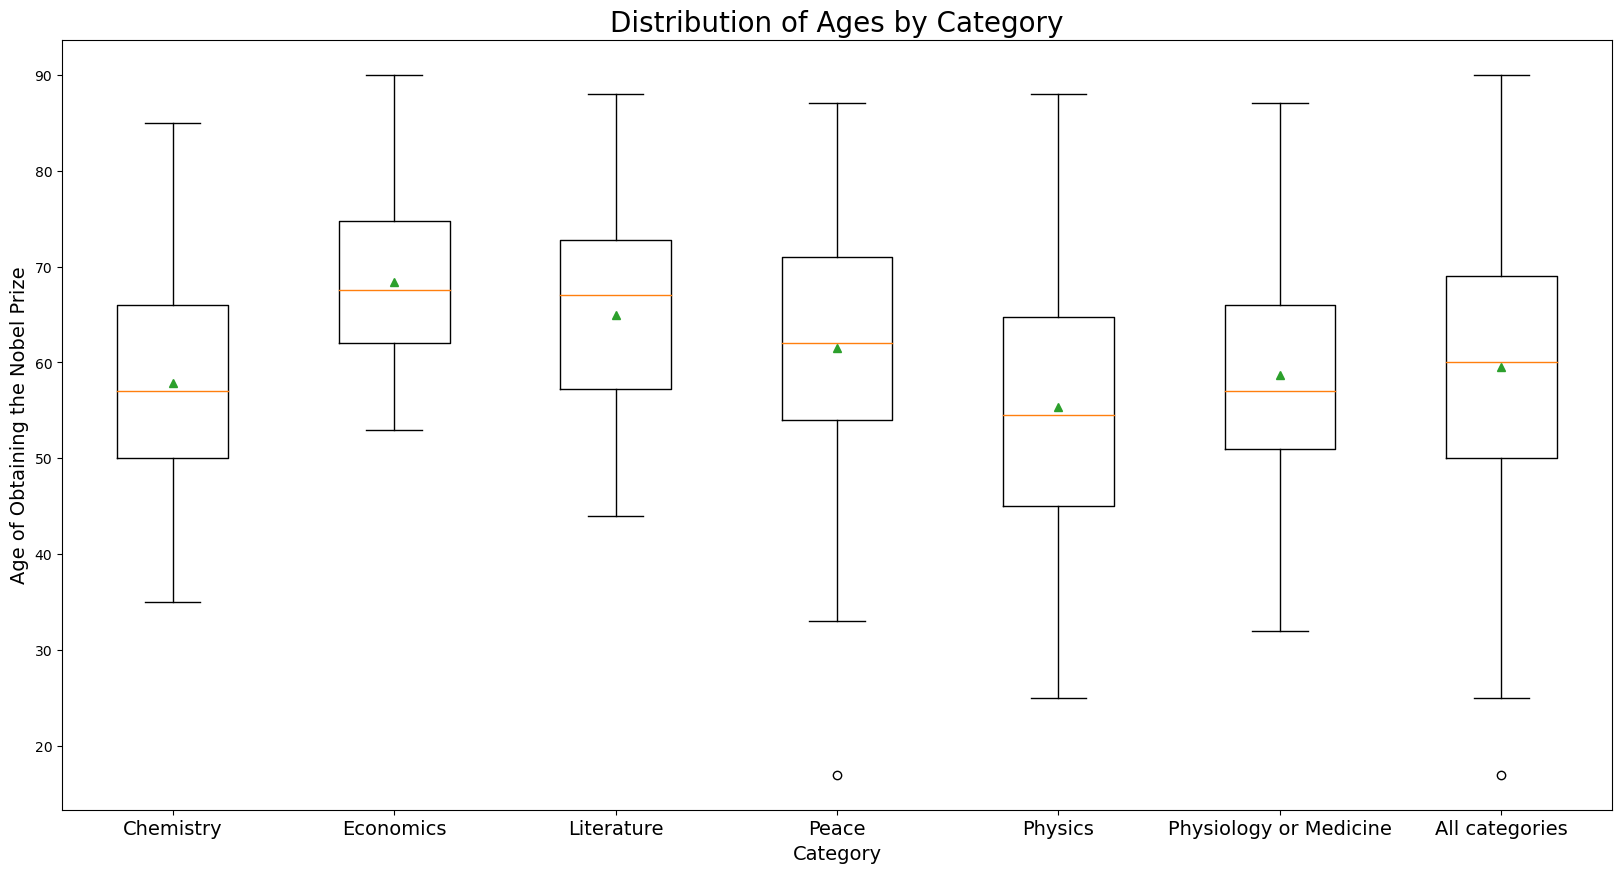

In [94]:
fig, ax = plt.subplots(figsize=(20,10))

ax.boxplot(age_of_winnings, 
           vert=True,
           showmeans=True,
           labels=categories);
ax.set_xticks(np.arange(1, len(categories)+1), labels=categories, fontsize=14);
ax.set_title('Distribution of Ages by Category', fontsize=20)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Age of Obtaining the Nobel Prize', fontsize=14);

In [71]:
plt.boxplot?